<a href="https://colab.research.google.com/github/MoutazMohamed0/Data110/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Task 1: Dataset Overview:**

Survived describes weather the passenger survived the voyage with 0 being  death and 1 being survival. PClass describes the passengers class on the ship it is on a scale of (1-3). Sex describes weather the passenger was a male or female. Age describes how old the passenger was while on the ship.
Sibsp describes the number of siblings that the passenger had on board. Fare describes how much the passenger paid for their ticket. Embarked describes where the passenger boarded the ship, with the first letter of the name of the port used to represent it in this column (with S being Southampton and C being Cherbourg). Class similar to PClass describes the passengers class on the ship (however rather than representing it on a scale of 1-3 it is represented as the character values First, Second, and Third). Who similar to Sex describes weather the passenger was a male or female. Adult Male describes whether the passenger was an adult male (True) or not (False). Deck describes the level of the ship where the passenger's cabin was located. Embarked Town similar to Embarked describes where the passenger boarded the ship in greater detail giving the full name of the port at which the passenger embarked. Alive describes whether the passenger survived. Alone describes if the passenger was alone on the ship.

**Task 2: Fare Distribution:**

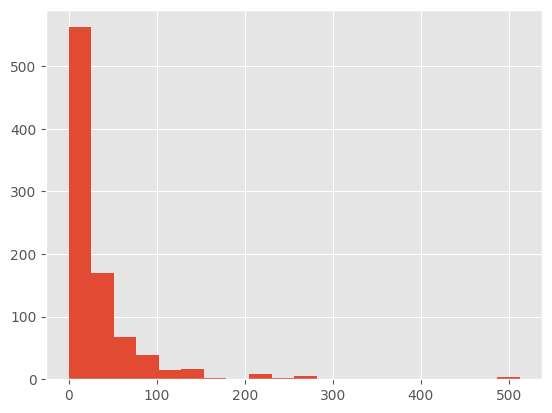

In [3]:
plt.style.use('ggplot')
plt.hist(titanic['fare'],bins=20)
plt.show()

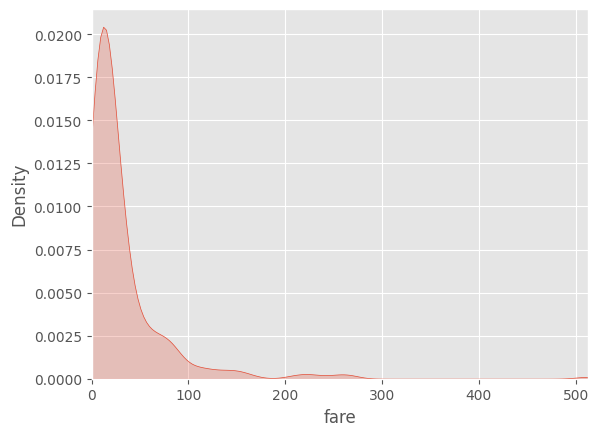

In [4]:
sns.kdeplot(titanic['fare'], fill=True)
max_fare = titanic['fare'].max()
plt.xlim(0, max_fare)
plt.show()

  A majority of the passengers paid a under 100 for their ticket, there were some outliers with few passengers purchasing their tickets for more than 500. Perhaps the higher the fare the better the rate of survival due to better accommodations.


**Task 3: Fare and Survival Rates:**

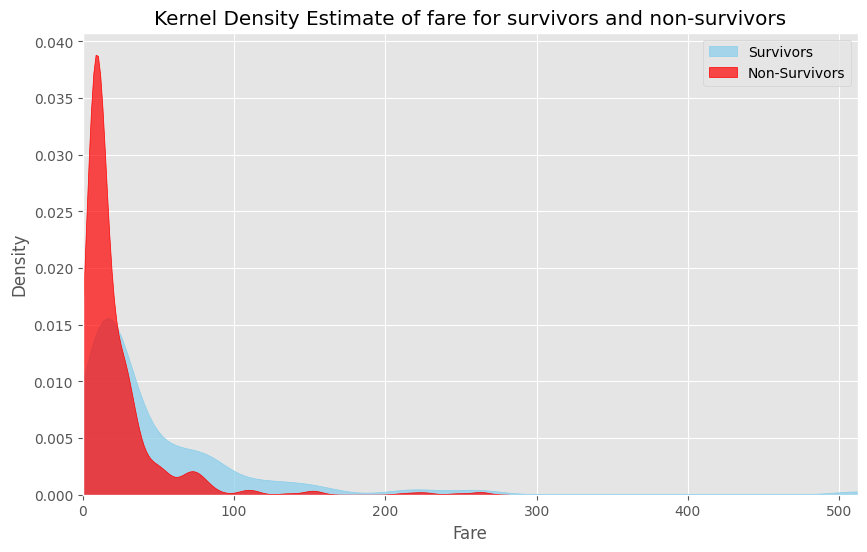

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['alive'] == 'yes']['fare'], bw_adjust=0.7, fill=True, color="skyblue", alpha=0.7, label='Survivors')
sns.kdeplot(titanic[titanic['alive'] == 'no']['fare'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Non-Survivors')
plt.xlim(0, max_fare)
plt.title('Kernel Density Estimate of fare for survivors and non-survivors')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

The data seems to suggest that the lower the fare, the lower the passengers chances of survival. This suggests that your rate of survival is positively correlated with your socioeconomic status.

**Task 4: Passenger Class, Fare, and Survival:**

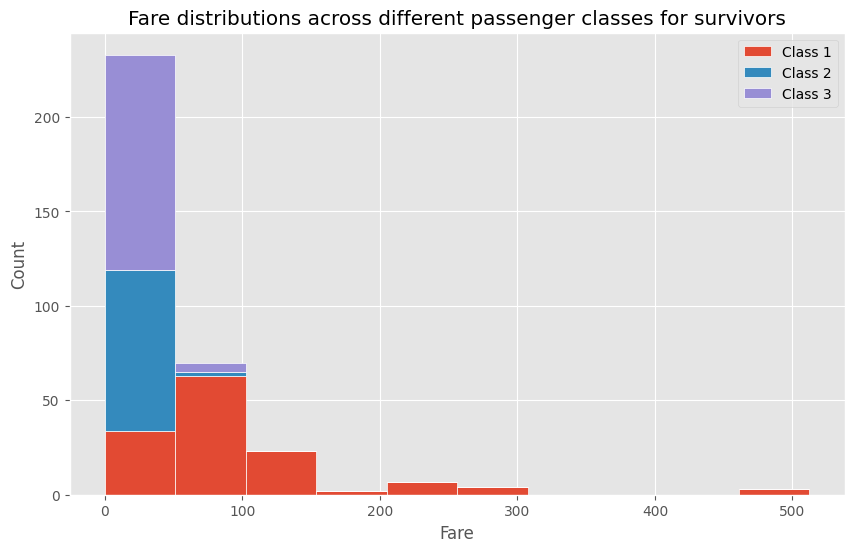

In [10]:
survived_class1 = titanic[(titanic['pclass'] == 1) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class2 = titanic[(titanic['pclass'] == 2) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class3 = titanic[(titanic['pclass'] == 3) & (titanic['alive'] == 'yes')]['fare'].dropna()
plt.figure(figsize=(10, 6))
plt.hist([survived_class1, survived_class2, survived_class3], stacked=True, edgecolor='white', label=['Class 1', 'Class 2', 'Class 3'])
plt.title('Fare distributions across different passenger classes for survivors')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

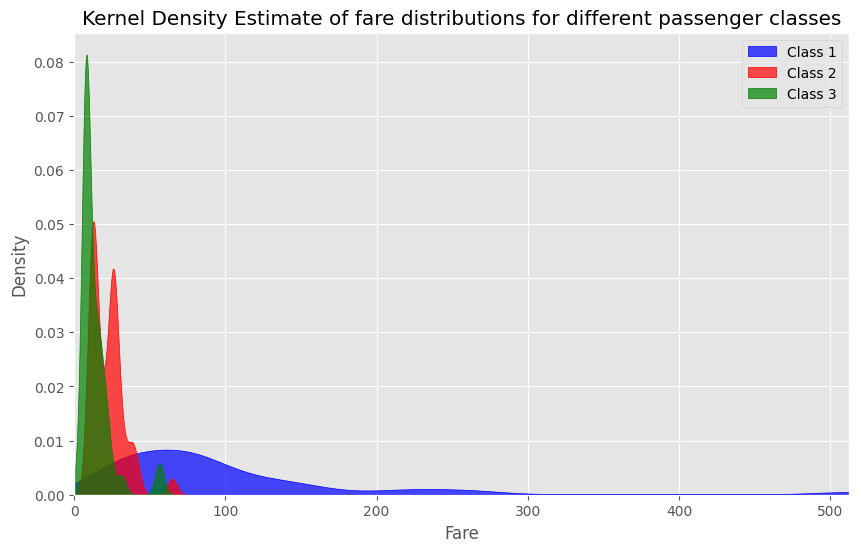

In [52]:
survived_class1 = titanic[(titanic['pclass'] == 1) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class2 = titanic[(titanic['pclass'] == 2) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class3 = titanic[(titanic['pclass'] == 3) & (titanic['alive'] == 'yes')]['fare'].dropna()
plt.figure(figsize=(10, 6))
plt.xlim(0, max_fare)
sns.kdeplot(survived_class1, bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Class 1')
sns.kdeplot(survived_class2, bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Class 2')
sns.kdeplot(survived_class3, bw_adjust=0.7, fill=True, color="green", alpha=0.7, label='Class 3')
plt.title('Kernel Density Estimate of fare distributions for different passenger classes')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

The data shows that survivors in class 1 tended to pay more than the survivors of other classes, while survivors in class 2 paid more than survivors in class 3. The fare distributions reflect the correlation between socioeconomic status (which we established is positively correlated with rate of survival) and fare, thus we can infer a positive correlation between fare and rate of survival.

**Task 5: Age of Survivors and Non-Survivors:**

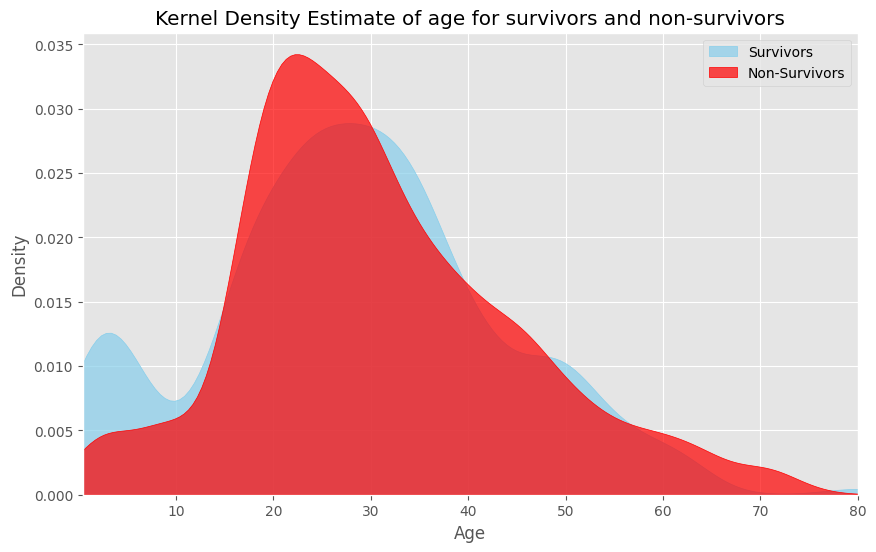

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['alive'] == 'yes']['age'], bw_adjust=0.7, fill=True, color="skyblue", alpha=0.7, label='Survivors')
sns.kdeplot(titanic[titanic['alive'] == 'no']['age'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Non-Survivors')
max_age = titanic['age'].max()
min_age = titanic['age'].min()
plt.xlim(min_age, max_age)
plt.title('Kernel Density Estimate of age for survivors and non-survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

The data suggests that younger and very elderly passengers tended to survive more then middle aged passengers. Age may have impacted survival rates because infant and elderly passengers may have been evacuated first.



**Task 6: Pyramid Histogram for Age Survival by Sex:**

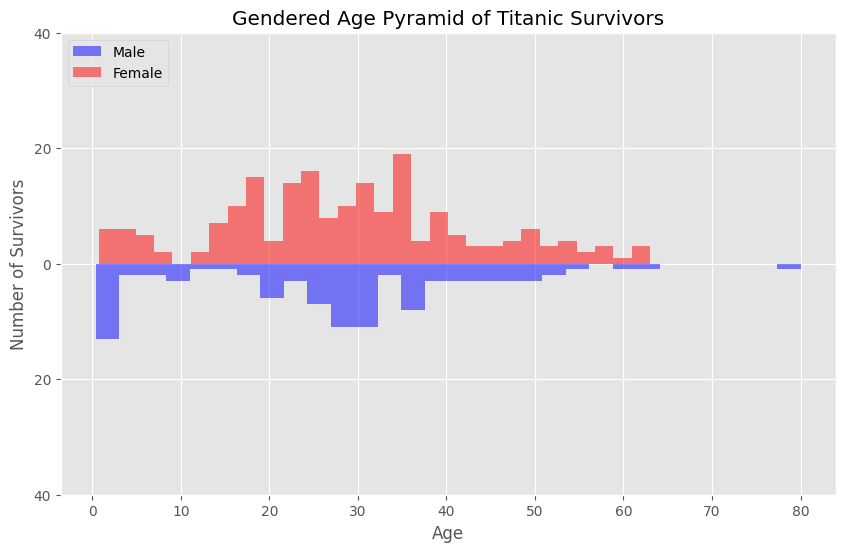

In [11]:
survived_male = titanic[(titanic['sex'] == 'male') & (titanic['alive'] == 'yes')]['age'].dropna()
survived_female = titanic[(titanic['sex'] == 'female') & (titanic['alive'] == 'yes')]['age'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(survived_male , bins=30, label='Male', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(survived_male))
plt.hist(survived_female, bins=30, label='Female', alpha=0.5, color='red', orientation='vertical', weights=[1] * len(survived_female))
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.title('Gendered Age Pyramid of Titanic Survivors')
plt.yticks([-40, -20, 0, 20, 40], [40, 20, 0, 20, 40])
plt.legend(loc='upper left')
plt.show()

It seems that the data suggests that overall more females survived than males. We can infer that the survival rate for females was higher across most ages ranges, and your rate of survival is positively coordinated with being female.